<a href="https://colab.research.google.com/github/JWoinski/PracaDyp/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils   

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


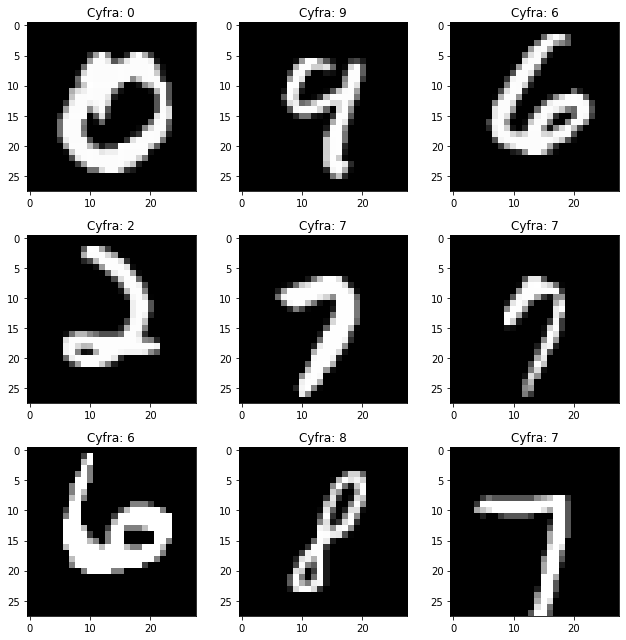

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # wielkosc wygenerowanej liczby

for i in range(9):
    plt.subplot(3,3,i+1) #wymiary tablicy
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Cyfra: {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    # print(col_maxes)
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  
0  0  0  0    0   57  114   86   86   86   86   86   86   86  141  170  

In [ ]:
X_train = X_train.reshape(60000, 784) # zmiana macierzy 28x28 na tablice o długości 28*28=784
X_test = X_test.reshape(10000, 784)   # to co wyzej

X_train = X_train.astype('float32')   # zmiana rozmiaru
X_test = X_test.astype('float32')

X_train /= 255                        # normalizacja
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10 # liczba klas w ktorych bedzie rozrozniac cechy

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()

In [ ]:
#pierwsza warstwa
model.add(Dense(512, input_shape=(784,)))

model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
# druga warstwa
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
#ostatnia warstwa
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 activation_17 (Activation)  (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 activation_18 (Activation)  (None, 512)               0         
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 8s 17ms/step - loss: 0.8167 - accuracy: 0.7584
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.3477 - accuracy: 0.8969
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.2745 - accuracy: 0.9188
Epoch 4/5
469/469 [==============================] - 7s 16ms/step - loss: 0.2259 - accuracy: 0.9324
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.1896 - accuracy: 0.9433


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1633 - accuracy: 0.9500
Test score: 0.16325463354587555
Test accuracy: 0.949999988079071


In [ ]:
predicted_classes = (model.predict(X_test) > 0.5).astype("int32")


# sprawdzenie ktory klasy są poprawne a ktore nie
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


<Figure size 648x648 with 0 Axes>

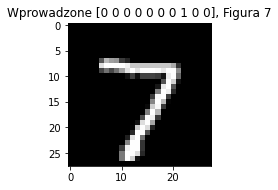

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Wprowadzone {}, Figura {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Wprowadzone {}, Figura {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

In [ ]:
# głęboka CNN

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # zmiana rozmiaru
X_test = X_test.astype('float32')

X_train /= 255                              #normalizacja
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
# one-hot format classes

nb_classes = 10 # liczba klas w ktorych bedziemy rozrozniac cechy

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# 1 warstwa 
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 rozne 3x3 kernele w tym 32 rozne funkcje mapowe
model.add(BatchNormalization(axis=-1))               # normalizacja funkcji mapujących przed aktywacją
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# 2 warstwa 
model.add(Conv2D(32, (3, 3)))                       
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                       
convLayer02 = MaxPooling2D(pool_size=(2,2))          
model.add(convLayer02)

# 3 warstwa 
model.add(Conv2D(64,(3, 3)))                        
model.add(BatchNormalization(axis=-1))               
convLayer03 = Activation('relu')                     
model.add(convLayer03)

# 4 warstwa
model.add(Conv2D(64, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                       
convLayer04 = MaxPooling2D(pool_size=(2,2))          
model.add(convLayer04)
model.add(Flatten())                                 

# 5 warstwa
model.add(Dense(512))                                
model.add(BatchNormalization())                      
model.add(Activation('relu'))                        

#ostatnia warstwa                    
model.add(Dropout(0.2))                              # 20% dropout losowo wybranych gałęzi
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 24, 24, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 181s 385ms/step - loss: 0.1266 - accuracy: 0.9609 - val_loss: 0.7577 - val_accuracy: 0.7646
Epoch 2/5
468/468 [==============================] - 181s 388ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0346 - val_accuracy: 0.9891
Epoch 3/5
468/468 [==============================] - 181s 386ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 4/5
468/468 [==============================] - 180s 384ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0432 - val_accuracy: 0.9859
Epoch 5/5
455/468 [============================>.] - ETA: 4s - loss: 0.0303 - accuracy: 0.9903